In [ ]:
from sympy import *
from dtumathtools import dtuplot
init_printing()

In [ ]:
k1, k2, kc, kb2, l1, l2, lg, it = symbols('k_1 k_2 k_c k_{b2} l_1 l_2 l_g I_t', real=True, positive=True)
m2, mr, g, u, w, t, phiu = symbols('m_2 m_r g u omega t phi_u', real=True, positive=True)
xi, ks, F0s, hp, cs = symbols('xi k_s F_{0s} h_p c_s', real=True, positive=True)
z_1, z_2, omega, t = symbols("z_1, z_2 omega t")

M = Matrix([[l2**(-2)*it, 0], [0, m2]])
K = Matrix([[k2 + (-g*lg*mr + k1*l1**2 + kc)/l2**2, -k2], [-k2, 2*F0s*(cs+1)/hp + k2 + 2*ks*(I*xi+1) + kb2]])
F = Matrix([l2**-1*u*omega**2*(sin(phiu)-I*cos(phiu)), 0])

In [ ]:
z_1, z_2, omega, t = symbols("z_1, z_2 omega t")
k_1, k_2, k_3, k_4 = symbols("k_1, k_2 k_3 k_4")
m_1, m_2 = symbols("m_1, m_2")
f_1, f_2 = symbols("f_1, f_2")

k_1, k_2, k_3, k_4 = K[0], K[1], K[2], K[3]
m_1, m_2 = M[0], M[1]
f_1, f_2 = F[0], F[1]

z = Matrix([z_1, z_2])*exp(I*omega*t)
k = K -omega**2 * M
f = Matrix([f_1, f_2])

mydict = {g:9.81,kc:0.7,u:14.8*10**(-6),
          phiu:7,mr:0.616,m2:1.410,it:31.2*10**(-3),
          lg:0.188,l1:0.118,l2:0.263,
          kb2:0.72*10**(3),k1:1.66*10**3,k2:1.61*10**3,
          hp:12*10**(-3), cs:0.24}

v30 = {ks:0.83, xi:33/100, F0s:5.2}
v50 = {ks:0.995, xi:21/100, F0s:8}
v70 = {ks:1.37, xi:10.5/100, F0s:9.65}

def get_z_tilde(temp):
    sol = k.gauss_jordan_solve(f)[0]
    x = sol.subs(mydict)
    x = x.subs(temp)
    z1 = x[0]
    z2 = x[1]
    z_tilde = Matrix([z1, z2])
    return z_tilde

In [ ]:
z_tilde_30 = get_z_tilde(v30)
z_tilde_50 = get_z_tilde(v50)
z_tilde_70 = get_z_tilde(v70)

---
## 5.3 
#### 30 grader

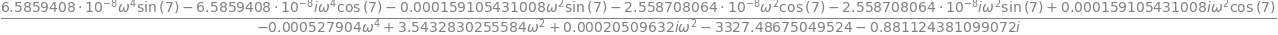

In [ ]:
z_tilde_30[0]

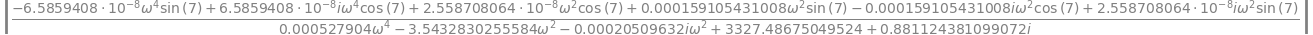

In [ ]:
abs(z_tilde_30[0])

For 30 grader


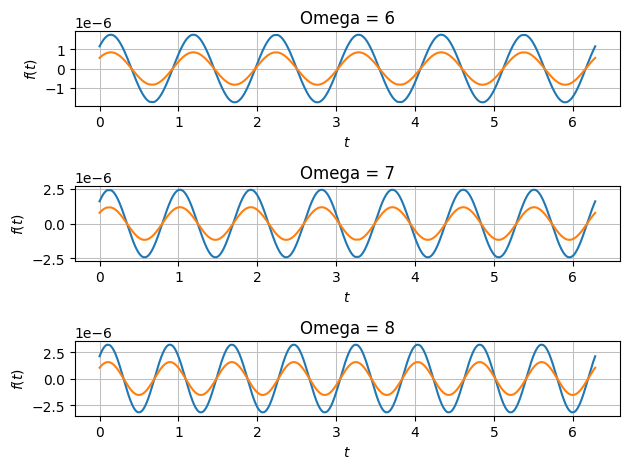

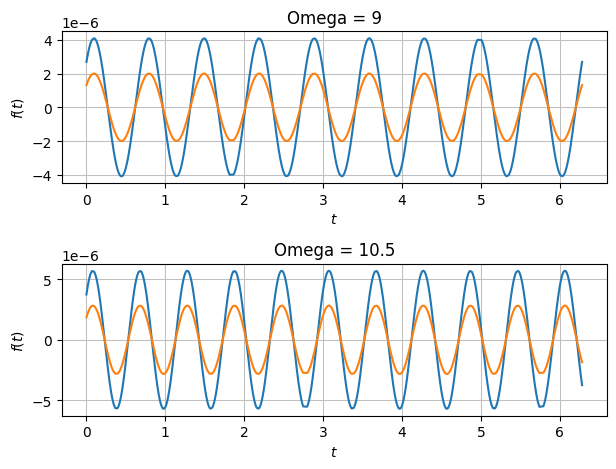

For 50 grader


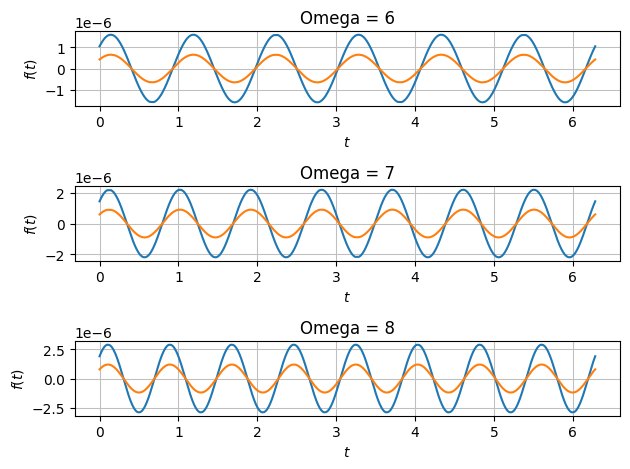

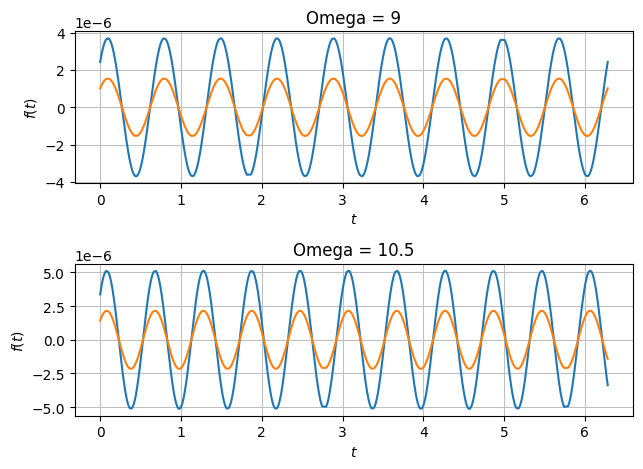

For 70 grader


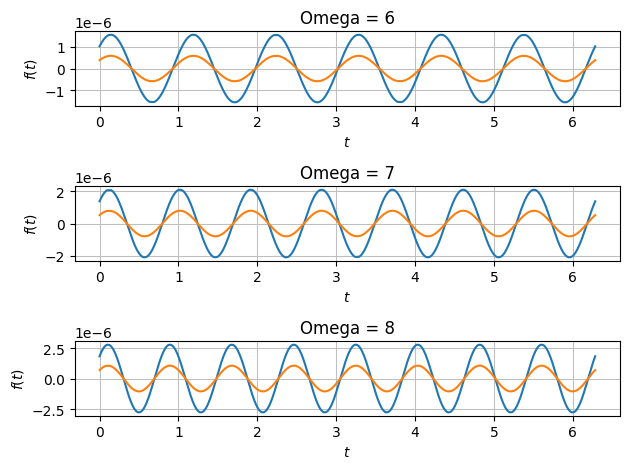

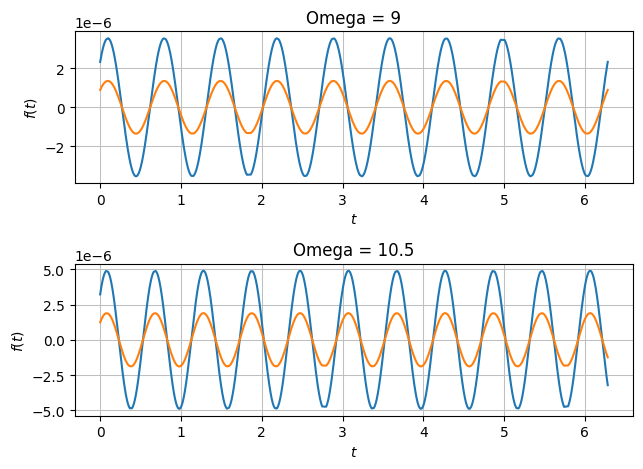

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from spb import *
from matplotlib.gridspec import GridSpec

omegaer = [6, 7, 8, 9]

z_tilder = [z_tilde_30, z_tilde_50, z_tilde_70]
names = [30, 50, 70]

for i in range(len(z_tilder)):
    z_tilde = z_tilder[i]
    z1 = z_tilde[0]
    z2 = z_tilde[1]

    Ap1 = abs(z1)
    Ap2 = abs(z2)

    phip1 = arg(z1)
    phip2 = arg(z2)

    yp = Matrix([Ap1*cos(omega*t+phip1), Ap2*cos(omega*t+phip2)])
    print(f"For {str(names[i])} grader")
    plot1 = plot(*yp.subs(omega, 6), (t,0,2*pi), title=f"Omega = 6", legend=False, show=False)
    plot2 = plot(*yp.subs(omega, 7), (t,0,2*pi), title=f"Omega = 7", legend=False,show=False)
    plot3 = plot(*yp.subs(omega, 8), (t,0,2*pi), title=f"Omega = 8", legend=False,show=False)
    plot4 = plot(*yp.subs(omega, 9), (t,0,2*pi), title=f"Omega = 9", legend=False,show=False)
    plot5 = plot(*yp.subs(omega, 10.5), (t,0,2*pi), title=f"Omega = 10.5", legend=False, show=False)
    dtuplot.plotgrid(plot1, plot2, plot3, plot4, plot5, nr=3, nc=2)
    #dtuplot.plotgrid(plot4, plot5, nr=2, nc=1)

